# Lab 3 Regresja Logistyczna

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import csv

#### Zadanie 1.

Bazując na skrypcie z poprzednich zajęć (algorytm optymalizacji parametrów regresji liniowej z wykorzystaniem metody gradientu prostego), proszę zaimplementować analogiczny algorytm dla problemu regresji logistycznej.
Wystarczy dokonać następujących zmian: należy zmodyfikować funkcję h_fun aby przyjęła postać:

(array([[-12.7644518 ],
       [  4.93909342]]), 0.07715876579444059)


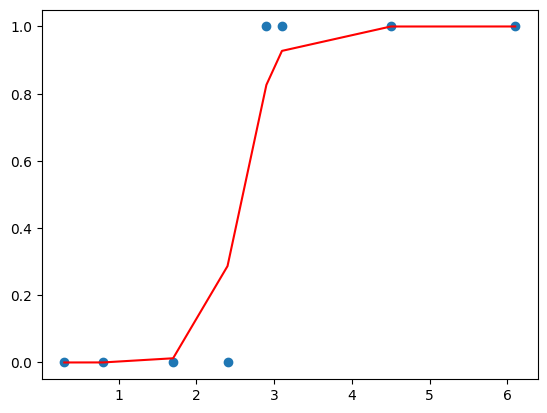

In [130]:
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta) + 1e-12
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

def get_logistic(X, y, theta = np.array([[0], [0]]), eps = 1e-5, alpha = 0.001):
    prev_cost = 2*calculate_cost(X, y, theta)
    m = X.shape[1]

    while(1):
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta = theta - (alpha/m) * gradient.T
        cost = calculate_cost(X, y, theta)
        if np.abs(cost - prev_cost) < eps:
            return (theta, cost)
        else:
            prev_cost = cost

X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])

y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

(theta, cost) = get_logistic(X, y, alpha=0.2)
print((theta, cost))

fig, ax = plt.subplots()
ax.scatter(X[1, :], y)
ax.plot(X[1, :], h_fun(X, theta)[0, :], 'r')

#### Zad 2

Proszę dokonać optymalizacji wag hipotezy regresji logistycznej dla danych. W pierwszej kolejności należy wczytać dane i odpowiednio je przekształcić:

In [131]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X.shape=}')
print(f'{y.shape=}')

X.shape=(3, 100)
y.shape=(1, 100)


In [134]:
(theta, cost) = get_logistic(X, y, theta=np.array([20, 20, 20]), alpha=0.001, eps=1e-4)
print((theta, cost))

C:\Users\janro\AppData\Local\Temp\ipykernel_24000\3194358332.py:9: RuntimeWarning: invalid value encountered in log
  y_0 = -(1-y)*np.log(1-h)


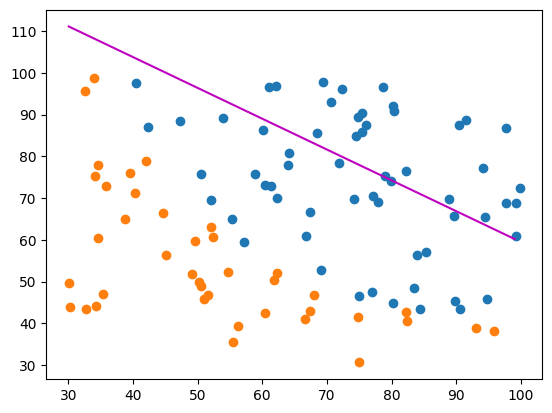

In [133]:
y_bool = np.array(y[0, :], dtype=bool)
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db


X1 = X[1, :]
X2 = X[2, :]

fig, ax = plt.subplots()
ax.scatter(X1[y_bool], X2[y_bool])
ax.scatter(X1[y_bool == 0], X2[y_bool == 0])
ax.plot(x1_db, x2_db, '-m')